In [32]:
import vaex
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')

In [4]:
df.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7


In [5]:
df.count()

array(1173057927)

<h1> That is a huge row count... This table has 1.1 billion rows </h1>
<h3> Now I want to use Vaex to analyse this huge dataset and find some interesting insight </h3>

In [6]:
payments = df[['payment_type', 'total_amount']]

In [7]:
payments.head(5)

#,payment_type,total_amount
0,CASH,9.4
1,Credit,14.6
2,Credit,28.44
3,CREDIT,18.45
4,CASH,3.7


In [8]:
payments.mean(payments.total_amount)

array(13.31476581)

In [9]:
payments_cash = payments[payments['payment_type'] == "CASH"]
payments_credit = payments[payments['payment_type'] == "CREDIT" or "Credit"]

In [12]:
payments_credit.mean([payments_credit['total_amount']])

array([15.24133959])

In [13]:
payments_cash.mean([payments_cash['total_amount']])

array([9.89524386])

<h2>The mean payment amount per trip is $13.31<br/>

The mean payment amount via card per trip is $15.24<br/>

The mean payment amount via cash per trip is $9.89<br/>
</h2>

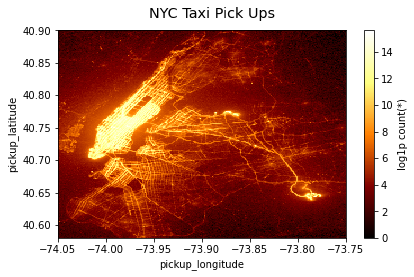

In [15]:
# Plotting the visualisations

df.plot(df.pickup_longitude, df.pickup_latitude, f="log1p", title="NYC Taxi Pick Ups", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);

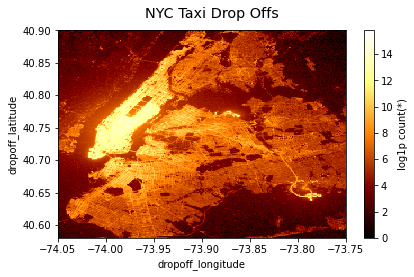

In [16]:
df.plot(df.dropoff_longitude, df.dropoff_latitude, f="log1p", title="NYC Taxi Drop Offs", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);

In [22]:
# Getting the more expensive trips

expensive_trips = df[df['total_amount'] > 13.31]
expensive_trips.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
1,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45
3,CMT,2009-01-05 16:02:52.000000000,2009-01-05 16:18:43.000000000,1,Cash,4.5,-73.9911,40.7277,nan,nan,-73.9458,40.7776,13.9,0,nan,0,0,13.9
4,DDS,2009-01-23 23:57:34.000000000,2009-01-24 00:12:40.000000000,2,CREDIT,5,-73.9926,40.7245,nan,nan,-73.9531,40.7776,13.3,0.5,nan,3.45,0,17.25


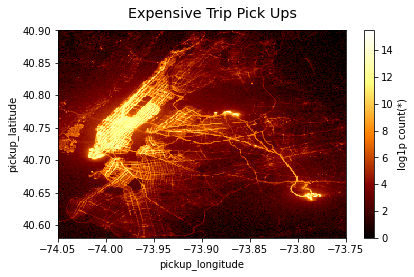

In [19]:
expensive_trips.plot(expensive_trips.pickup_longitude, expensive_trips.pickup_latitude, f="log1p", title="Expensive Trip Pick Ups", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);

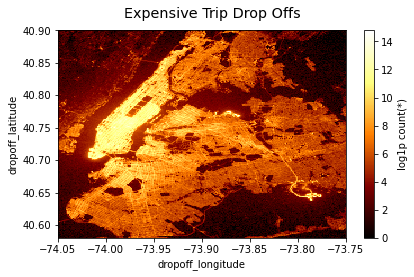

In [20]:
expensive_trips.plot(expensive_trips.dropoff_longitude, expensive_trips.dropoff_latitude, f="log1p", title="Expensive Trip Drop Offs", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);

In [23]:
# Getting the cheaper trips

cheaper_trips = df[df['total_amount'] < 13.31]
cheaper_trips.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7
2,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6
3,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7
4,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6


In [106]:
# Working out the average distance of expensive and cheaper trips

avg_cheaper_distance = cheaper_trips.mean([cheaper_trips['trip_distance']])
print(avg_cheaper_distance)
avg_expensive_distance = expensive_trips.mean([expensive_trips['trip_distance']])
print(avg_expensive_distance)

[2.85357818]
[11.07892884]


In [77]:
# Seeing the difference in tips for cheaper vs more expensive trips

avg_cheaper_tip = cheaper_trips.mean([cheaper_trips['tip_amount']])
avg_expensive_tip = expensive_trips.mean([expensive_trips['tip_amount']])

In [95]:
avg_cheaper_tip

array([0.5641504])

In [96]:
avg_expensive_tip

array([2.39671026])

<h2>The tips given on more expensive trips are over 4 x greater than tips given on cheaper trips, which is in line with the average distance of more expensive trips being c. 4 x greater. </h2>